<a href="https://colab.research.google.com/github/radosty/radosty.github.io/blob/main/regressiongdpppcanddigitalpaymentadoptioneurope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

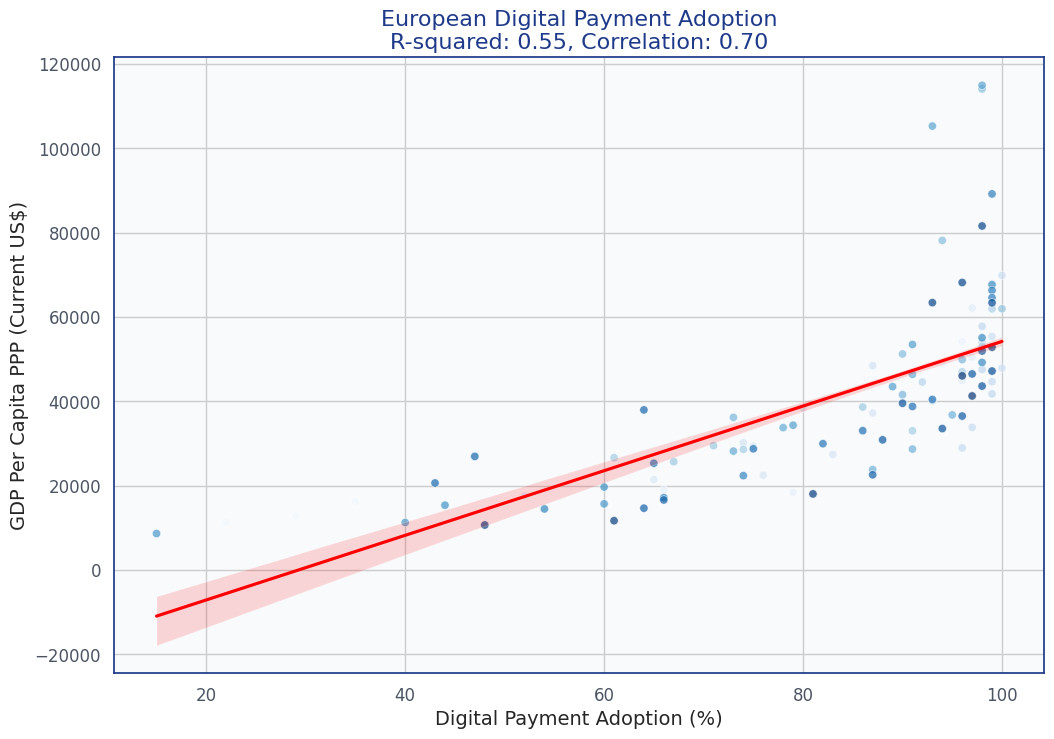

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import numpy as np
url1 = 'https://raw.githubusercontent.com/radosty/radosty.github.io/refs/heads/main/Cleaned_European_Digital_Payment.csv'
url2 = 'https://raw.githubusercontent.com/radosty/radosty.github.io/refs/heads/main/merged_data_fintech_gdp_ue_inflation.csv'
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

#merge
merged_data = pd.merge(data1, data2, on=['Country', 'Year'])

#drop
merged_data.drop(columns=['Fintech Investment'], inplace=True)

#filter out missing value rows
data = merged_data.dropna()

X = data[['Digital Payment Adoption (%)', 'Inflation rate', 'Unemployment rate']]
Y = data['GDP Per Capita PPP (Current US$)']

# fitting the ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, Y)

#predicting gdp
data['Predicted GDP'] = ridge_model.predict(X)

#r squared calculations
r_squared = r2_score(Y, data['Predicted GDP'])
correlation_matrix = np.corrcoef(data['Digital Payment Adoption (%)'], Y)
correlation_coefficient = correlation_matrix[0, 1]

#styling the chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", rc={'axes.facecolor':'#f8fafc', 'axes.edgecolor':'#1e3a8a'})

#plotting
sns.scatterplot(data=data,
                x='Digital Payment Adoption (%)',
                y='GDP Per Capita PPP (Current US$)',
                hue='Country',
                alpha=0.7,
                legend=False,
                palette="Blues")

#line of BF
sns.regplot(data=data,
            x='Digital Payment Adoption (%)',
            y='Predicted GDP',
            scatter=False,
            color='red')

#styling
plt.title(f'European Digital Payment Adoption\nR-squared: {r_squared:.2f}, Correlation: {correlation_coefficient:.2f}',
          fontsize=16,
          color="#1e3a8a")
plt.xlabel('Digital Payment Adoption (%)', fontsize=14)
plt.ylabel('GDP Per Capita PPP (Current US$)', fontsize=14)
plt.xticks(fontsize=12, color="#4b5563")
plt.yticks(fontsize=12, color="#4b5563")

plt.show()